Import Consoles

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline
plt.rcParams.update({
    "font.family": "Arial",     # Nature uses sans-serif fonts for labels
    "font.size": 8,             # Readable font size
    "mathtext.fontset": "custom",
    "mathtext.rm": "Arial",
    "mathtext.it": "Arial",
    "figure.dpi": 300,          # High resolution
    "figure.facecolor": "white",
    "axes.linewidth": 1,        # Thicker axis lines
    "xtick.major.size": 4,      # Major tick size
    "ytick.major.size": 4
})

Data Handling

In [2]:
data = pd.read_excel('Mydata.xlsx', sheet_name='Sheet1', engine='openpyxl',header=1) #header is in row 2 so it is used for calling data
#CL defining
CL = {
    "CL13": data.iloc[0:27, 1:],    # Select all columns, dictionary making
    "CL14": data.iloc[28:53, 1:],
    "CL15": data.iloc[54:79, 1:],
    "CL16": data.iloc[80:105, 1:],
    "CL17": data.iloc[106:131, 1:],
    "CL18": data.iloc[132:157, 1:]
} 
# Display first few rows of each section
for name, df in CL.items():
    print(f"--- {name} ---")
    print(df.head())

--- CL13 ---
   Leach Days  H2SO4 fed : Mg+Ca in feed, mol/mol  Effluent Collected, g  \
0        0.96                              0.0013                   30.6   
1        2.02                              0.0037                   55.3   
2        2.99                              0.0061                   53.8   
3        4.10                              0.0087                   60.8   
4        6.86                              0.0150                  144.7   

   Effluent rate, mL/h  Effluent rate, mL/h/cm2  Effluent pH  \
0                 1.18                     0.09         9.08   
1                 1.96                     0.15         8.72   
2                 2.06                     0.16         8.93   
3                 2.05                     0.16         8.99   
4                 1.95                     0.15         8.81   

   Acid Consumed, %  Effluent [Mg+Ca], mol/L  Mg+Ca Extraction, mol%  \
0             100.0                    0.084                    0.12   
1

Functions

defining

C:\Users\KwonsooKim\AppData\Local\Temp\ipykernel_13236\4166684853.py:78: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


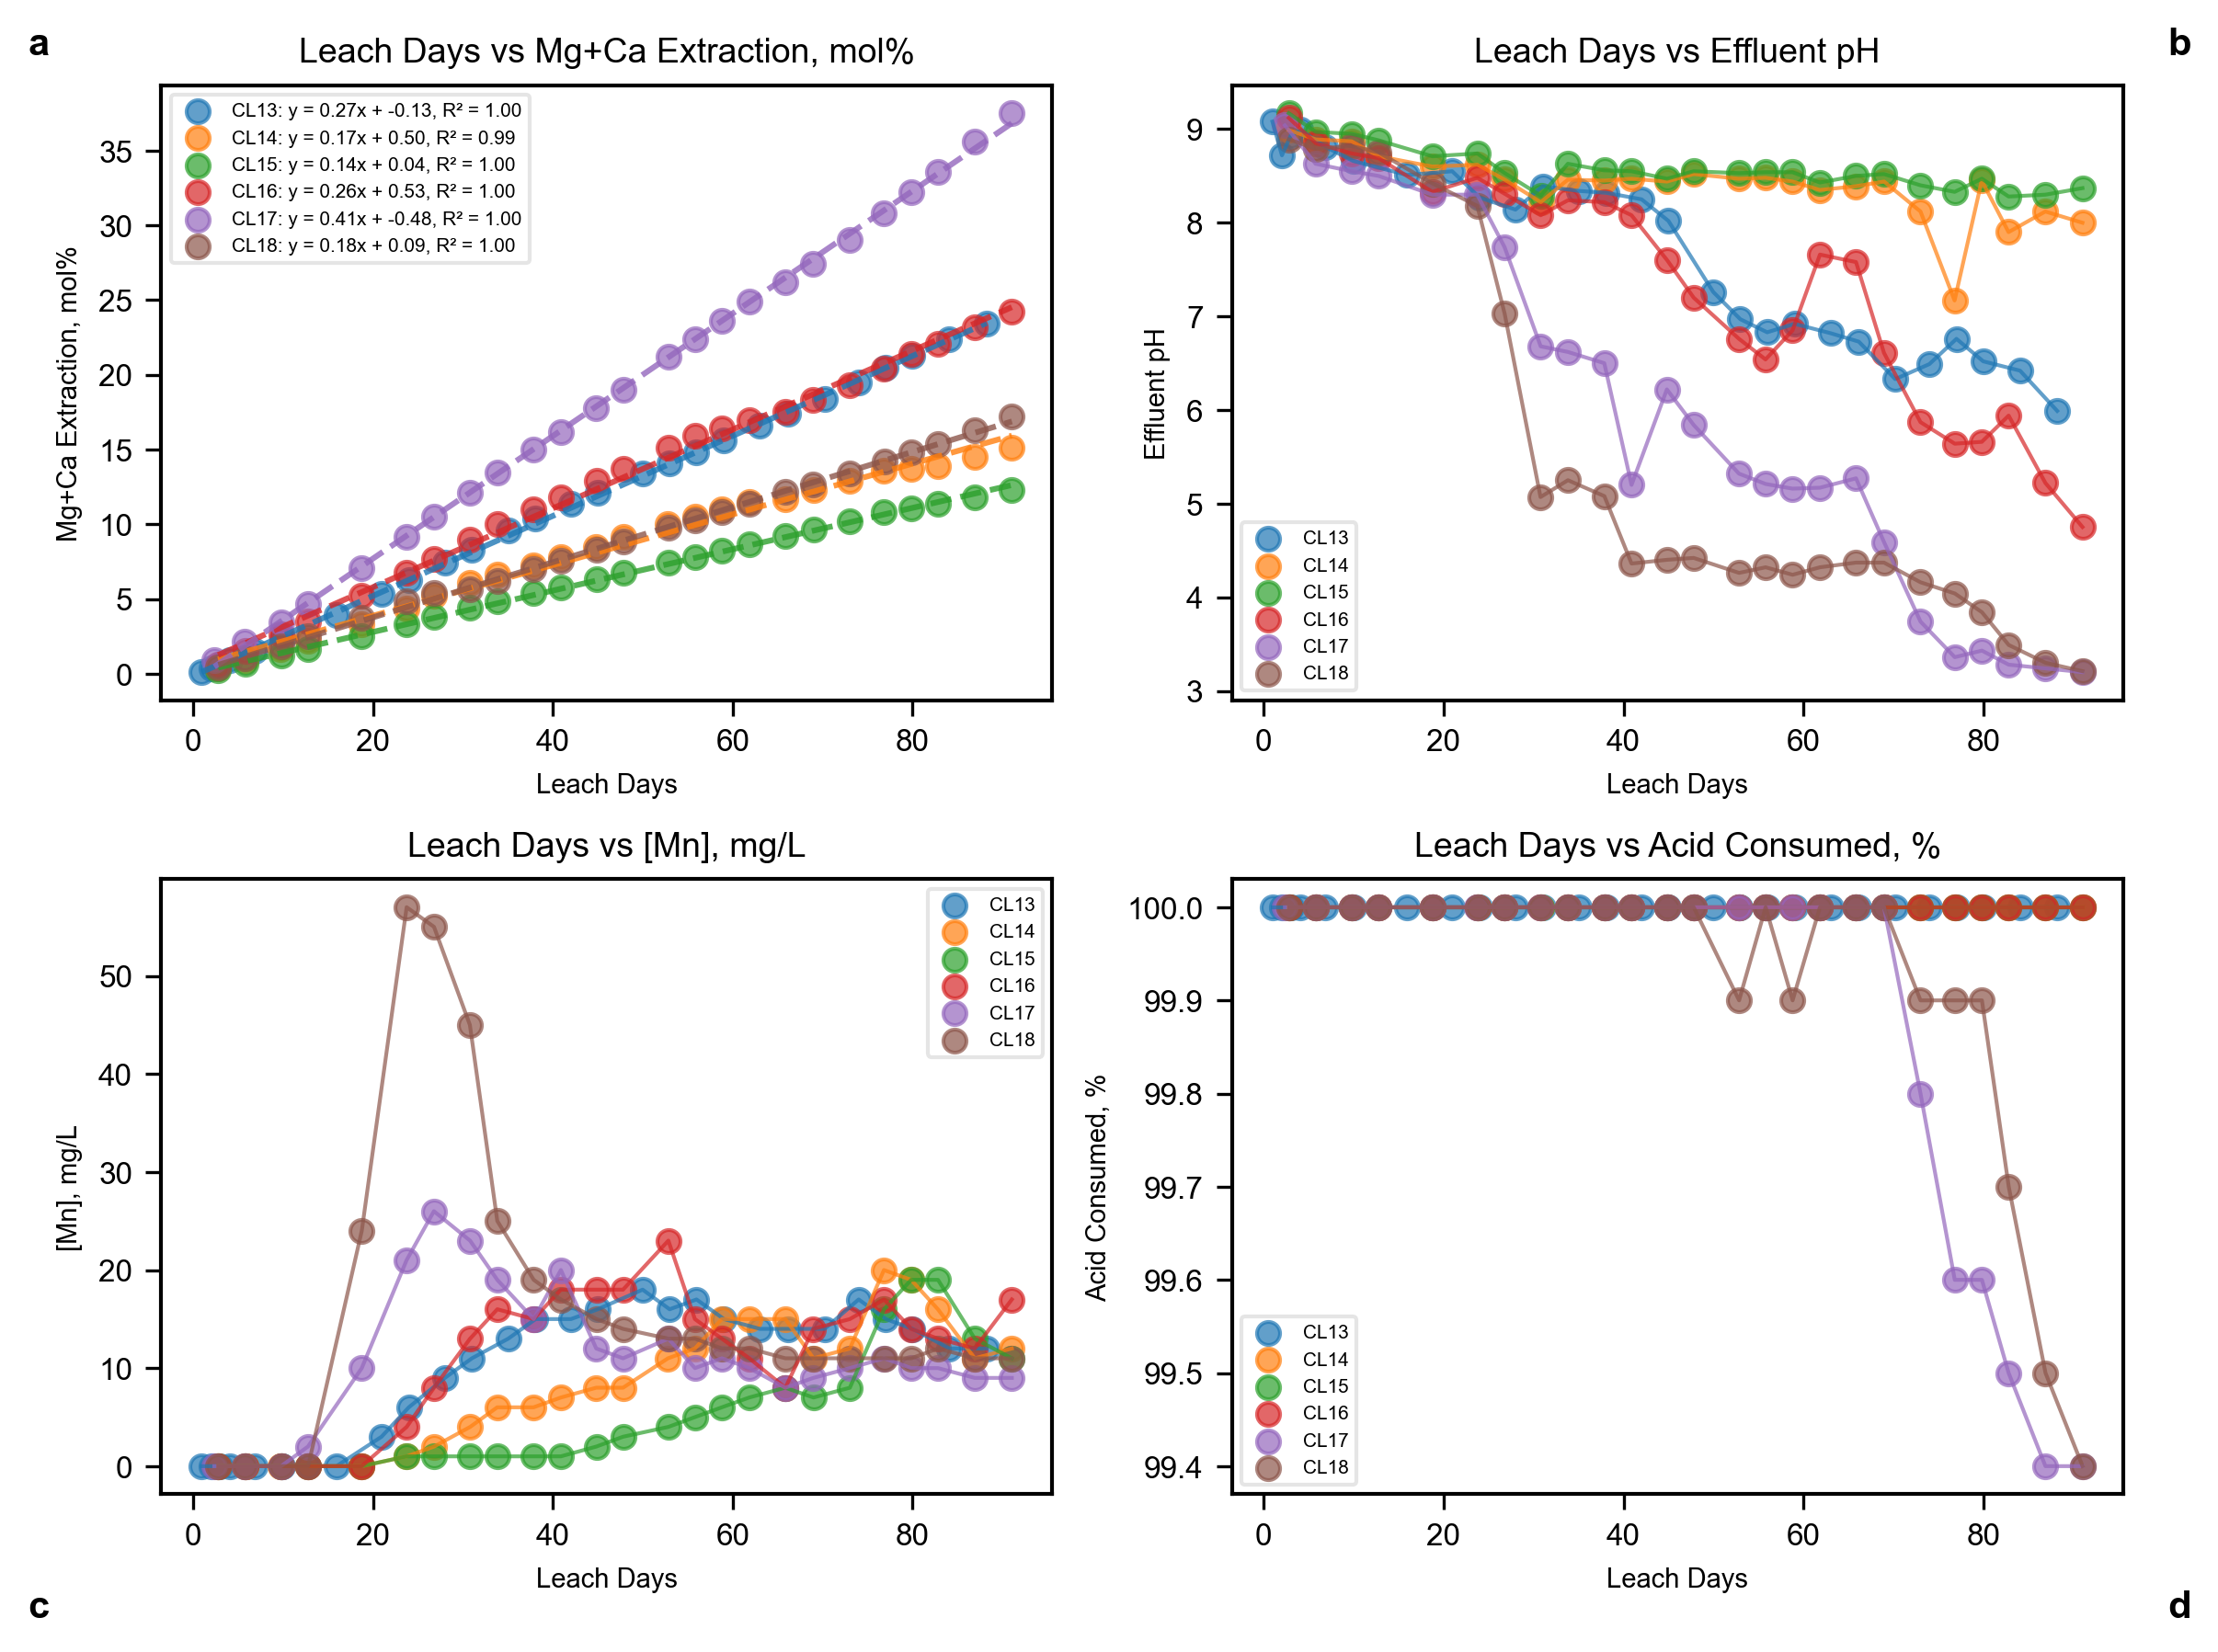

In [3]:
# Select four properties for plotting
properties = [
    ("Leach Days", "Mg+Ca Extraction, mol%"),
    ("Leach Days", "Effluent pH"),
    ("Leach Days", "[Mn], mg/L"),
    ("Leach Days", "Acid Consumed, %")
]

# Create figure with larger size for better visibility
fig, axes = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)  # Ensures even spacing

# Define subpanel labels
subpanel_labels = ['a', 'b', 'c', 'd']

# Adjust spacing for external labels
label_positions = [
    (-0.15, 1.05),  # a (Top-left, outside)
    (1.05, 1.05),   # b (Top-right, outside)
    (-0.15, -0.2),  # c (Bottom-left, outside)
    (1.05, -0.2)    # d (Bottom-right, outside)
]

# Loop through subplots and plot different data
for i, (x_col, y_col) in enumerate(properties):
    ax = axes[i // 2, i % 2]  # Access subplot
    legend_labels = []
    legend_handles = []

    for cl_name, df in sorted(CL.items()):  # Sort alphabetically
        df_clean = df.dropna(subset=[x_col, y_col])
        X = df_clean[x_col].values
        Y = df_clean[y_col].values

        # Sort data before plotting
        sorted_indices = np.argsort(X)
        X_sorted, Y_sorted = X[sorted_indices], Y[sorted_indices]

        # Scatter plot
        scatter = ax.scatter(X, Y, label=cl_name, alpha=0.7)

        # Connecting lines (except first subplot)
        if i != 0:
            ax.plot(X_sorted, Y_sorted, linestyle="-", alpha=0.7, linewidth=1, color=scatter.get_facecolors()[0])

        # Regression (only in first subplot)
        if len(X) > 1 and i == 0:
            coeffs = np.polyfit(X, Y, 1)
            Y_pred = np.polyval(coeffs, X_sorted)
            color = scatter.get_facecolors()[0]

            # Regression line
            ax.plot(X_sorted, Y_pred, linestyle="--", alpha=0.8, color=color)

            # Compute R² score
            r2 = r2_score(Y, np.polyval(coeffs, X))

            # Store equation for legend
            equation_text = f"{cl_name}: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}, R² = {r2:.2f}"
            legend_labels.append(equation_text)
            legend_handles.append(scatter)

    # Labels and Title
    ax.set_xlabel(x_col, fontsize=7)
    ax.set_ylabel(y_col, fontsize=7)
    ax.set_title(f"{x_col} vs {y_col}", fontsize=9)

    # Add subpanel label (outside the graph)
    ax.text(label_positions[i][0], label_positions[i][1], subpanel_labels[i], 
            transform=ax.transAxes, fontsize=10, fontweight='bold')

    # Set legend (only show regression in first subplot)
    if i == 0:
        ax.legend(legend_handles, legend_labels, loc="best", fontsize=5, framealpha=0.5)
    else:
        ax.legend(loc="best", fontsize=5, framealpha=0.5)

# Adjust layout for publication-style spacing
plt.tight_layout()

# Save figure in Nature format (450 dpi)
plt.savefig("Experimental Status.tiff", format="tiff", dpi=450, facecolor="white")

# Show figure
plt.show()

Property of fluids

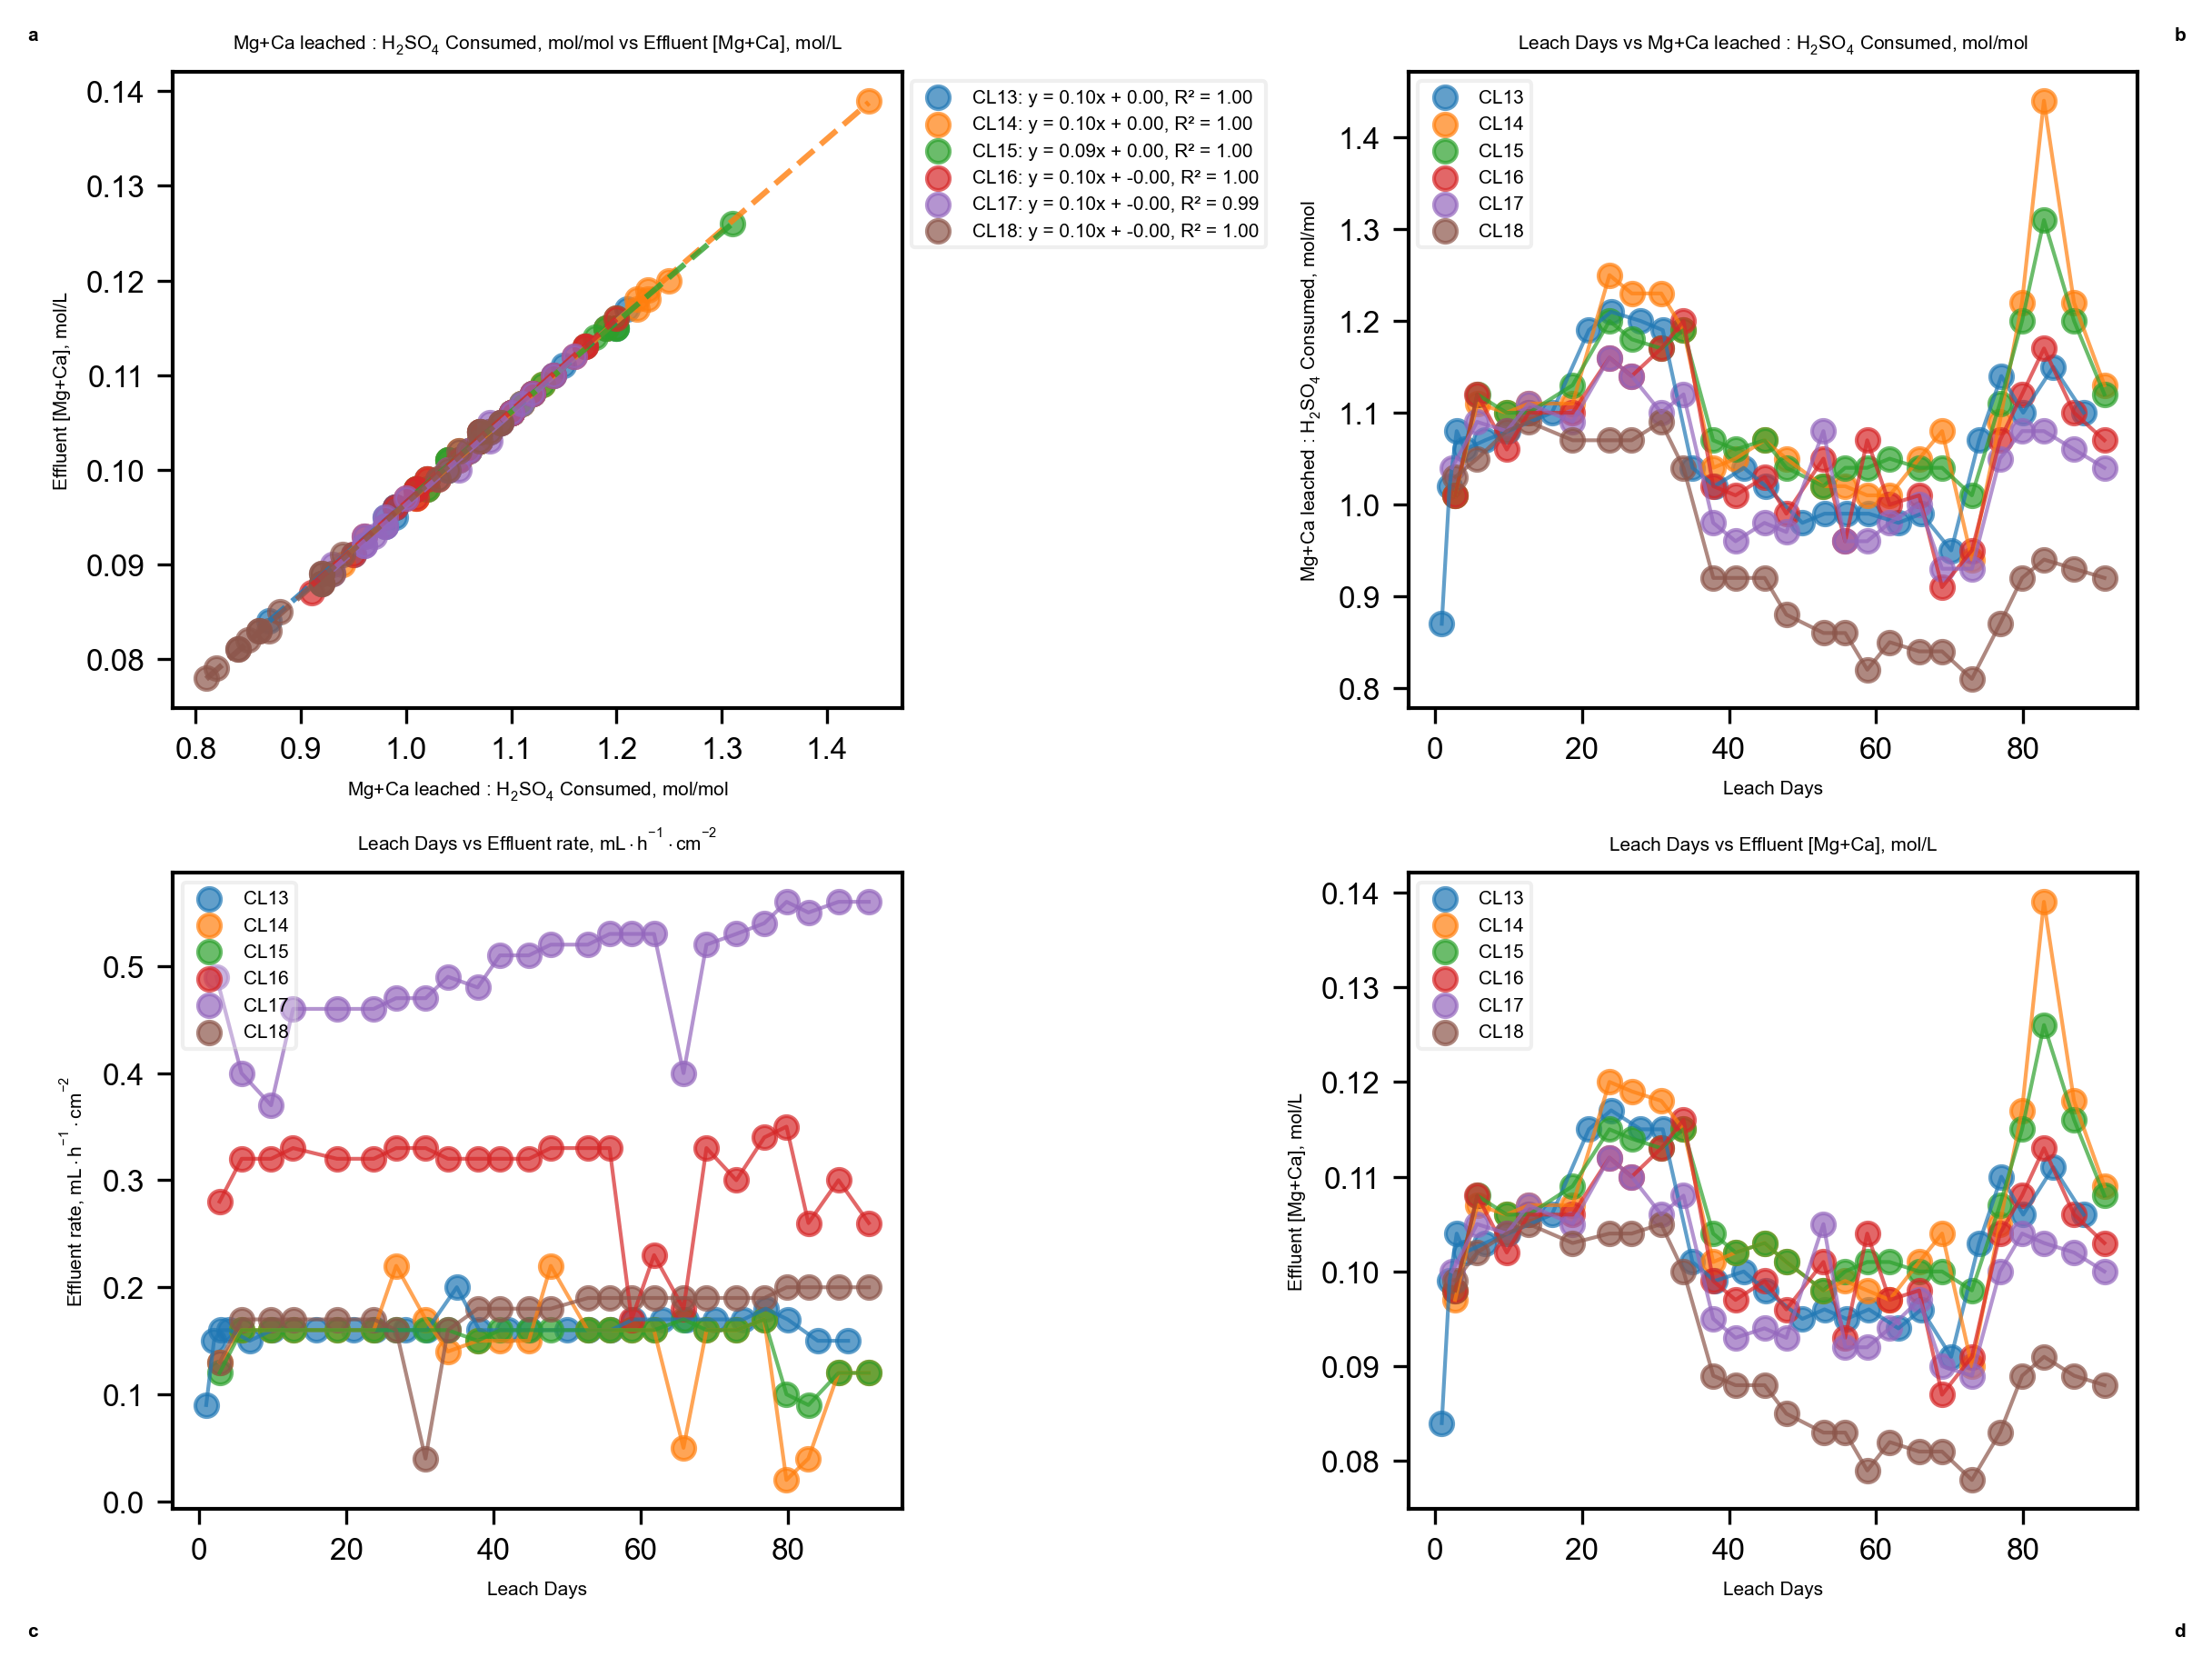

In [4]:
# Select four properties to plot
properties = [
    ("Mg+Ca leached : H2SO4 Consumed, mol/mol", "Effluent [Mg+Ca], mol/L"),
    ("Leach Days", "Mg+Ca leached : H2SO4 Consumed, mol/mol"),
    ("Leach Days", "Effluent rate, mL/h/cm2"),
    ("Leach Days", "Effluent [Mg+Ca], mol/L")
]

# Create figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)

# Define subpanel labels
subpanel_labels = ['a', 'b', 'c', 'd']

# Adjust spacing for external labels
label_positions = [
    (-0.2, 1.05),  # a (Top-left, outside)
    (1.05, 1.05),  # b (Top-right, outside)
    (-0.2, -0.2),  # c (Bottom-left, outside)
    (1.05, -0.2)   # d (Bottom-right, outside)
]

# Loop through subplots and plot different data
for i, (x_col, y_col) in enumerate(properties):
    ax = axes[i // 2, i % 2]  # Access subplot (row, col)
    legend_labels = []  
    legend_handles = []  

    for cl_name, df in sorted(CL.items()):  # Ensure alphabetical order
        df_clean = df.dropna(subset=[x_col, y_col])  
        X = df_clean[x_col].values
        Y = df_clean[y_col].values

        # Sort X and Y before plotting
        sorted_indices = np.argsort(X)
        X_sorted, Y_sorted = X[sorted_indices], Y[sorted_indices]

        # Scatter plot
        scatter = ax.scatter(X, Y, label=cl_name, alpha=0.7)

        # **Only show connecting lines in subplots except the first one**
        if i != 0:  
            ax.plot(X_sorted, Y_sorted, linestyle="-", alpha=0.7, linewidth=1, color=scatter.get_facecolors()[0])

        # **Only show regression in the first subplot**
        if len(X) > 1 and i == 0:  
            coeffs = np.polyfit(X, Y, 1)
            Y_pred = np.polyval(coeffs, X_sorted)

            # Get color from scatter points
            color = scatter.get_facecolors()[0]

            # Regression line in matching color
            ax.plot(X_sorted, Y_pred, linestyle="--", alpha=0.8, color=color)

            # Compute R² score
            r2 = r2_score(Y, np.polyval(coeffs, X))

            # Store equation for legend
            equation_text = f"{cl_name}: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}, R² = {r2:.2f}"
            legend_labels.append(equation_text)
            legend_handles.append(scatter)  

    # Format Labels (Using LaTeX for subscript & superscript)
    formatted_xlabel = x_col.replace("H2SO4", r"$\mathrm{H_2SO_4}$").replace("mL/h/cm2", r"$\mathrm{mL \cdot h^{-1} \cdot cm^{-2}}$")
    formatted_ylabel = y_col.replace("H2SO4", r"$\mathrm{H_2SO_4}$").replace("mL/h/cm2", r"$\mathrm{mL \cdot h^{-1} \cdot cm^{-2}}$")
    
    ax.set_xlabel(formatted_xlabel, fontsize=5)
    ax.set_ylabel(formatted_ylabel, fontsize=5)
    ax.set_title(f"{formatted_xlabel} vs {formatted_ylabel}", fontsize=5)

    # Add subpanel label (outside the graph)
    ax.text(label_positions[i][0], label_positions[i][1], subpanel_labels[i], 
            transform=ax.transAxes, fontsize=5, fontweight='bold')

    # Set legend

    if i == 0:  
        ax.legend(legend_handles, legend_labels, loc="upper left", bbox_to_anchor=(1, 1), fontsize=5, framealpha=0.3)
    else:
        ax.legend(loc="upper left", fontsize=5, framealpha=0.3)

# Save figure
plt.savefig("Effluents.tiff", format="tiff", dpi=450, facecolor="white")

# Show figure
plt.show()

Manganese Regression; 

<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
C:\Users\KwonsooKim\AppData\Local\Temp\ipykernel_13236\1636807147.py:34: SyntaxWarning: invalid escape sequence '\l'
  legend_label = f"{cl_name}: $y = {coeffs[0]:.3f} \log(x) + {coeffs[1]:.3f}, R^2 = {R2:.3f}$"


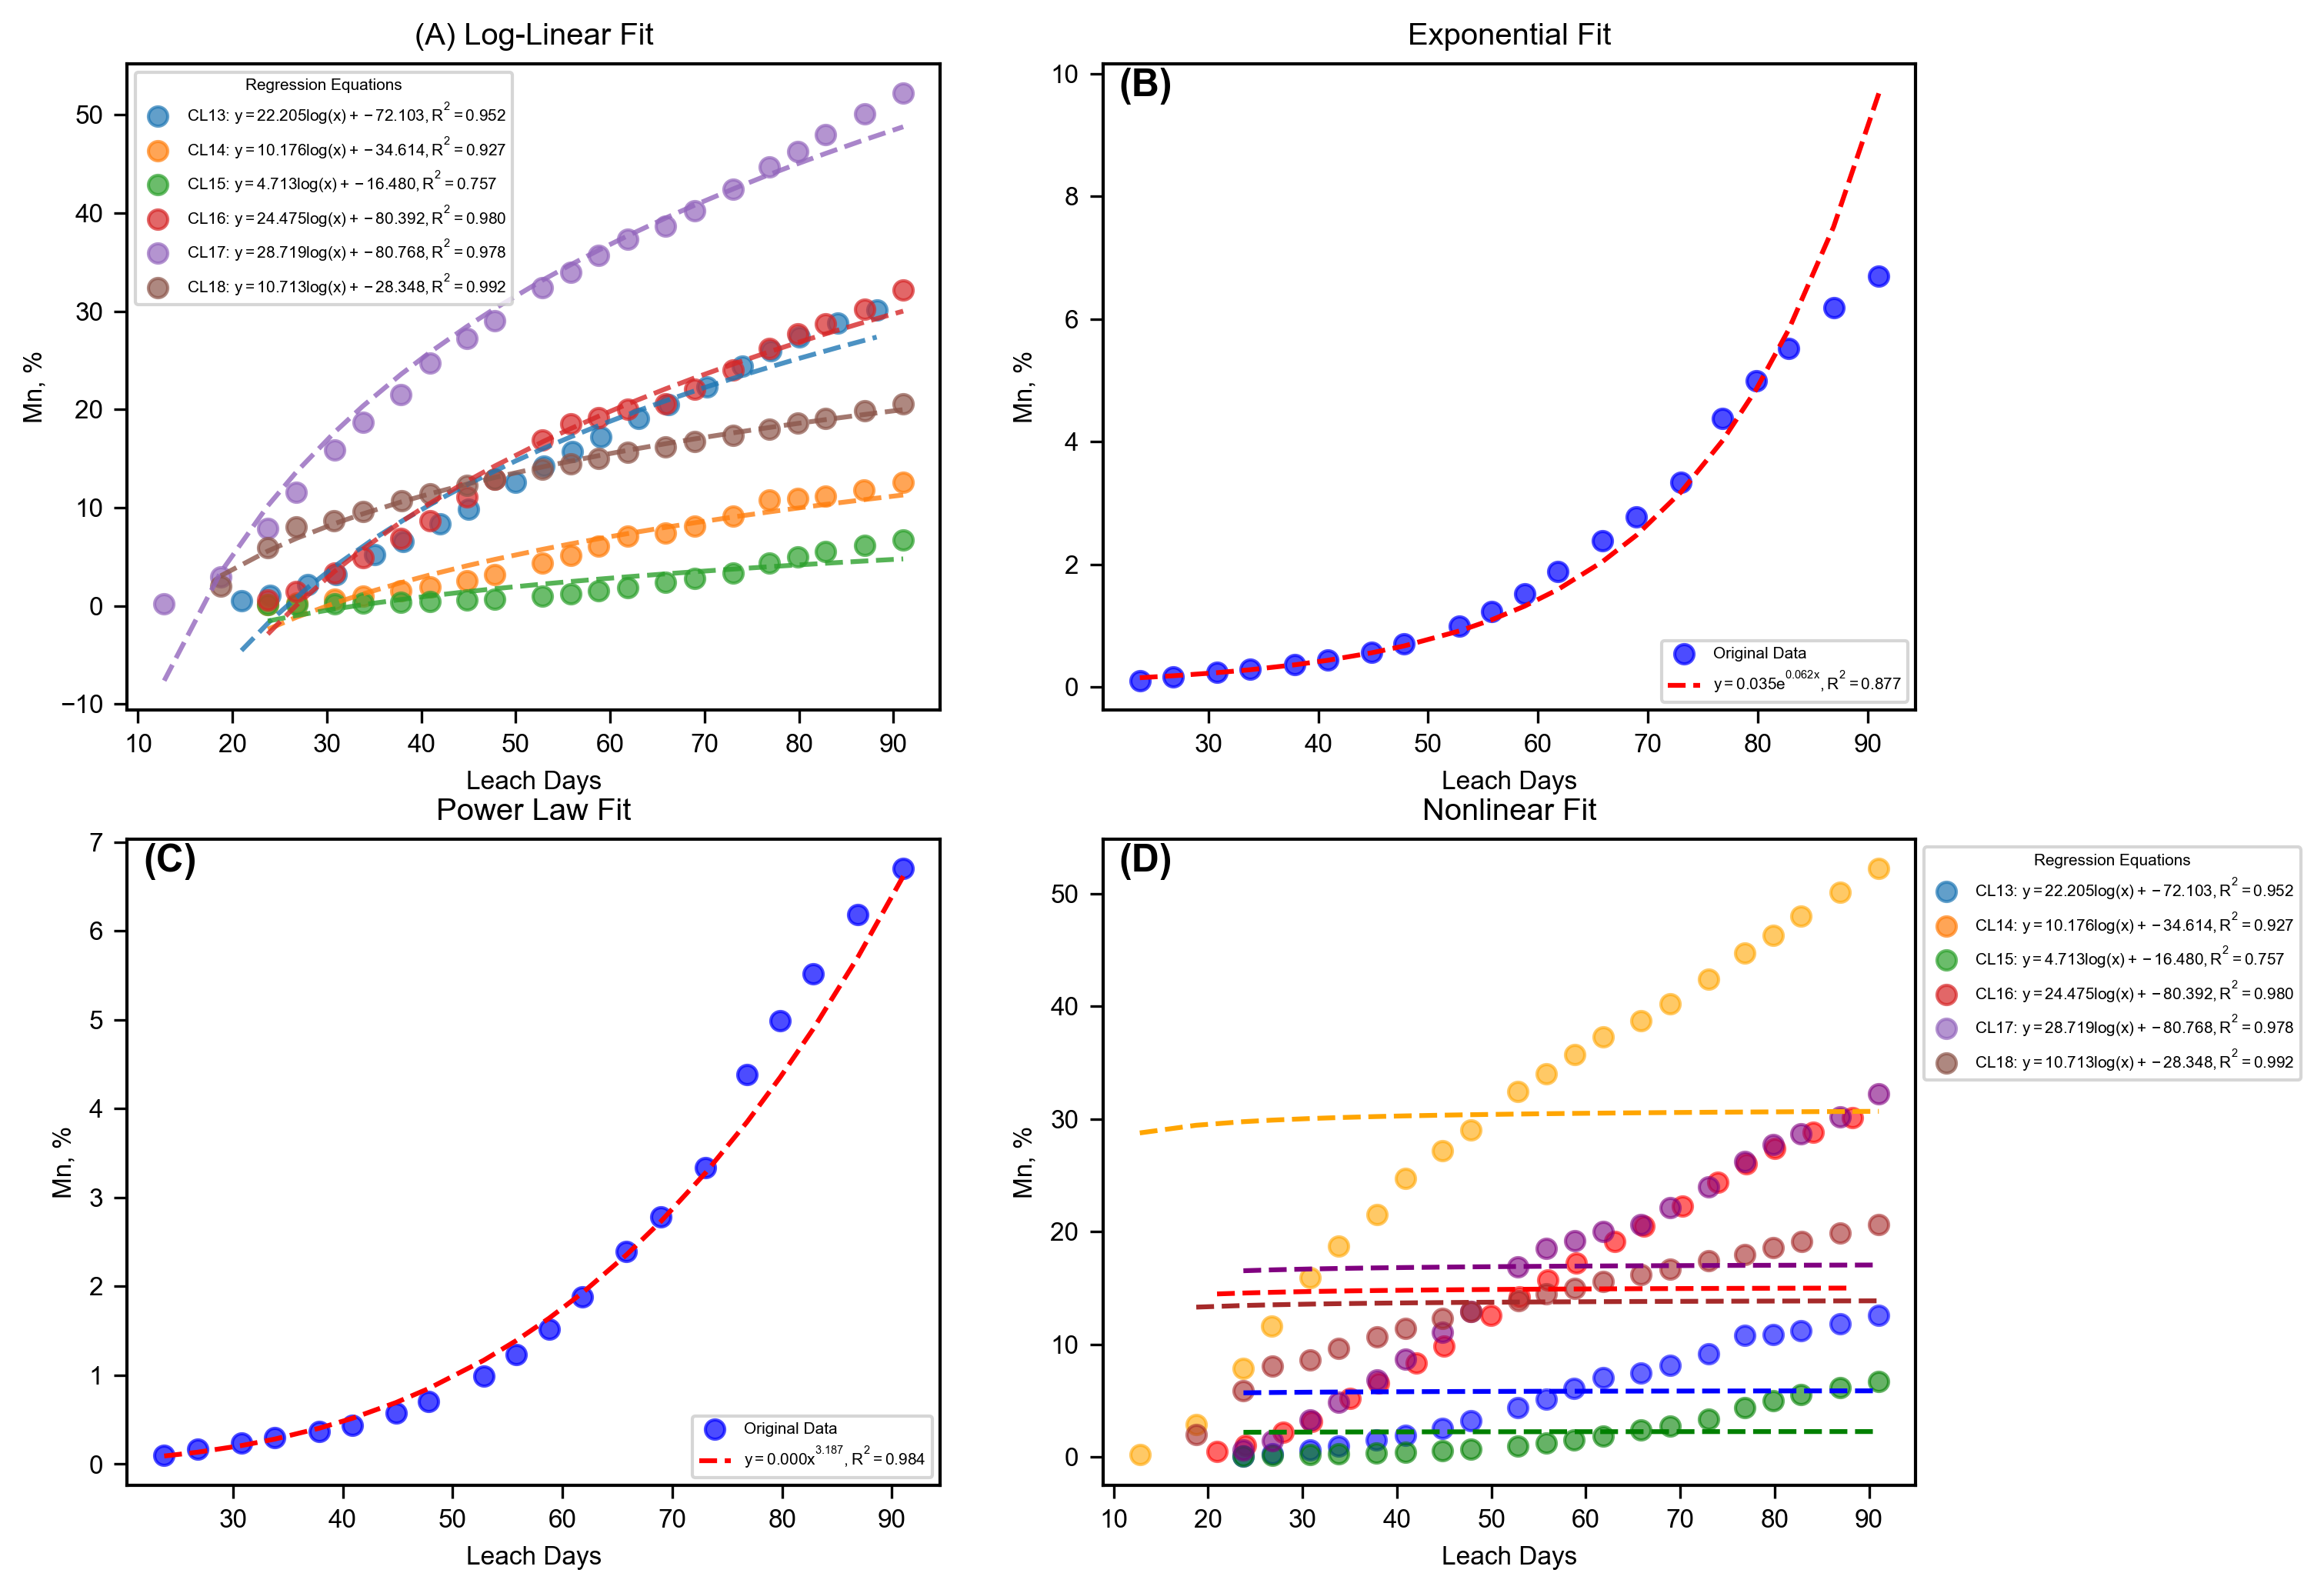

In [5]:
# Define nonlinear function y = ax / (1 + x)
def nonlinear_model(x, a):
    return (a * x) / (1 + x)

# Create subplots (2x2 layout)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
subplot_labels = ["(A)", "(B)", "(C)", "(D)"]

# Define colors for each dataset
colors = ["red", "blue", "green", "purple", "orange", "brown"]
regression_equations = {}


# === SUBPLOT 1: Log-Linear Regression (y = m log(x) + b) ===
ax = axes[0, 0]
legend_handles = []  # Store scatter points with correct colors

for i, (cl_name, df) in enumerate(CL.items()):
    df_clean = df.dropna(subset=["Leach Days", "Mn, %"])
    X = df_clean["Leach Days"].values
    Y = df_clean["Mn, %"].values
    
    # Scatter plot
    scatter = ax.scatter(X, Y, alpha=0.7, label=cl_name)

    if len(X) > 1:
        coeffs = np.polyfit(np.log(X), Y, 1)
        Y_pred = np.polyval(coeffs, np.log(X))
        R2 = r2_score(Y, Y_pred)

        line, = ax.plot(X, Y_pred, linestyle="--", alpha=0.8)

        # Create a legend entry with the correct marker color
        legend_label = f"{cl_name}: $y = {coeffs[0]:.3f} \log(x) + {coeffs[1]:.3f}, R^2 = {R2:.3f}$"
        legend_handles.append(mlines.Line2D([], [], color=scatter.get_facecolor()[0], marker="o", linestyle="None", markersize=6, label=legend_label))

ax.set_xlabel("Leach Days")
ax.set_ylabel("Mn, %")
ax.set_title("(A) Log-Linear Fit")

# Add legend with scatter markers
ax.legend(
    handles=legend_handles, 
    fontsize=5,  # Reduce text size
    loc="upper left", 
    title="Regression Equations",  # Add title
    title_fontsize=5  # Smaller title font
)

# === SUBPLOT 2: Exponential Fit (y = a e^(bx)) ===
ax = axes[0, 1]
df = CL["CL15"].dropna(subset=["Leach Days", "Mn, %"])
X = df["Leach Days"].values
Y = df["Mn, %"].values
valid_indices = Y > 0
X, Y = X[valid_indices], Y[valid_indices]
log_Y = np.log(Y)

coeffs = np.polyfit(X, log_Y, 1)
b, log_a = coeffs
a = np.exp(log_a)
Y_pred = a * np.exp(b * X)
R2 = r2_score(Y, Y_pred)

ax.scatter(X, Y, label="Original Data", color="blue", alpha=0.7)
ax.plot(X, Y_pred, linestyle="--", color="red", label=fr"$y = {a:.3f}e^{{{b:.3f}x}}, R^2 = {R2:.3f}$")
ax.set_xlabel("Leach Days")
ax.set_ylabel("Mn, %")
ax.set_title("Exponential Fit")
ax.legend(fontsize=5)
ax.text(0.02, 0.95, subplot_labels[1], transform=ax.transAxes, fontsize=12, fontweight='bold')

# === SUBPLOT 3: Power Law Fit (y = ax^b) ===
ax = axes[1, 0]
valid_indices = (X > 0) & (Y > 0)
X, Y = X[valid_indices], Y[valid_indices]
log_X, log_Y = np.log(X), np.log(Y)

coeffs = np.polyfit(log_X, log_Y, 1)
b, log_a = coeffs
a = np.exp(log_a)
Y_pred = a * X**b
R2 = r2_score(Y, Y_pred)

ax.scatter(X, Y, label="Original Data", color="blue", alpha=0.7)
ax.plot(X, Y_pred, linestyle="--", color="red", label=fr"$y = {a:.3f}x^{{{b:.3f}}}, R^2 = {R2:.3f}$")
ax.set_xlabel("Leach Days")
ax.set_ylabel("Mn, %")
ax.set_title("Power Law Fit")
ax.legend(fontsize=5)
ax.text(0.02, 0.95, subplot_labels[2], transform=ax.transAxes, fontsize=12, fontweight='bold')

# === SUBPLOT 4: Nonlinear Fit (y = ax / (1 + x)) ===
ax = axes[1, 1]
for (cl_name, df), color in zip(CL.items(), colors):
    df_clean = df.dropna(subset=["Leach Days", "Mn, %"])
    X = df_clean["Leach Days"].values
    Y = df_clean["Mn, %"].values
    params, _ = curve_fit(nonlinear_model, X, Y)
    a_fit = params[0]
    Y_pred = nonlinear_model(X, a_fit)
    R2 = r2_score(Y, Y_pred)
    
    ax.scatter(X, Y, label=f"{cl_name} Data", color=color, alpha=0.6)
    ax.plot(X, Y_pred, linestyle="dashed", color=color, label=fr"{cl_name}: $y = \frac{{{a_fit:.2f}x}}{{1+x}}, R^2 = {R2:.2f}$")

ax.set_xlabel("Leach Days")
ax.set_ylabel("Mn, %")
ax.set_title("Nonlinear Fit")
ax.legend(
    handles=legend_handles, 
    fontsize=5,  # Reduce text size
    loc="upper left", 
    bbox_to_anchor=(1, 1),  # Move outside plot if needed
    title="Regression Equations",  # Add title
    title_fontsize=5  # Smaller title font
)
ax.text(0.02, 0.95, subplot_labels[3], transform=ax.transAxes, fontsize=12, fontweight='bold')

# Adjust layout and save
plt.savefig("Mn_Regression_Analysis_Updated.tiff", format="tiff", bbox_inches="tight", dpi=450, facecolor="white")
plt.show()

# Print Regression Equations
for cl_name, equation in regression_equations.items():
    print(equation)